In [1]:
import pandas as pd
import numpy as np

# Load the data
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Display the first few rows of the training data
print("Training Data Head:")
print(train_df.head())

# Display the shape of the dataframes
print(f"\nTraining data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training Data Head:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         

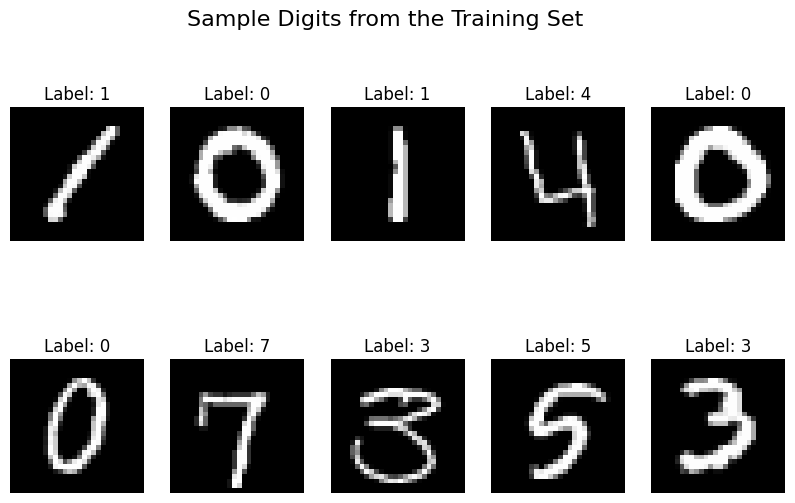

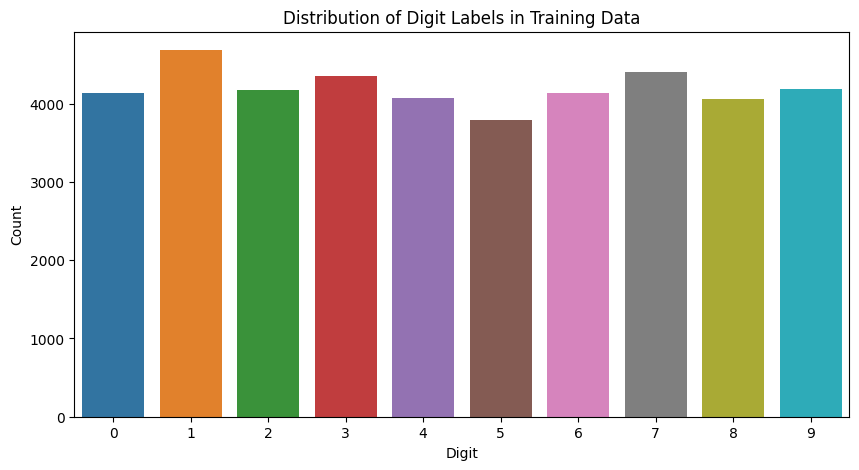

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separate features (pixels) and labels (digits)
X_train_full = train_df.drop(columns=['label'])
y_train_full = train_df['label']

# 2. Visualize some of the digits
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    # Reshape the 784 pixels into a 28x28 image
    image = X_train_full.iloc[i].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y_train_full.iloc[i]}")
    plt.axis('off')
plt.suptitle("Sample Digits from the Training Set", fontsize=16)
plt.show()

# 3. Check the distribution of the labels
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_full)
plt.title("Distribution of Digit Labels in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [3]:
from tensorflow.keras.utils import to_categorical

# 1. Normalize the pixel values to be between 0 and 1
X_train_full = X_train_full / 255.0
# Also normalize the test data, which we will use later
test_images = test_df / 255.0

# 2. Reshape the data for the CNN
# The shape should be (number_of_images, height, width, color_channels)
X_train_full = X_train_full.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)

# 3. One-hot encode the labels
y_train_full_cat = to_categorical(y_train_full, num_classes=10)

# Print the new shapes to verify
print(f"Training images shape: {X_train_full.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Categorical training labels shape: {y_train_full_cat.shape}")

2025-10-20 20:08:51.087707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760990931.343765      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760990931.434110      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training images shape: (42000, 28, 28, 1)
Test images shape: (28000, 28, 28, 1)
Categorical training labels shape: (42000, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential([
    # First convolutional block
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to feed into dense layers
    Flatten(),

    # Dense layer for classification
    Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting
    Dropout(0.5),

    # Output layer with 10 units (for 10 digits) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-20 20:09:12.345761: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from sklearn.model_selection import train_test_split

# We'll use 90% for training and 10% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_cat, test_size=0.1, random_state=42
)

# Set training parameters
epochs = 15
batch_size = 64

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val)
)

Epoch 1/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.8026 - loss: 0.6251 - val_accuracy: 0.9738 - val_loss: 0.0851
Epoch 2/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9693 - loss: 0.1074 - val_accuracy: 0.9824 - val_loss: 0.0566
Epoch 3/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9769 - loss: 0.0750 - val_accuracy: 0.9857 - val_loss: 0.0426
Epoch 4/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9816 - loss: 0.0586 - val_accuracy: 0.9879 - val_loss: 0.0404
Epoch 5/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9864 - loss: 0.0457 - val_accuracy: 0.9871 - val_loss: 0.0402
Epoch 6/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9860 - val_loss: 0.0438
Epoch 7/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9884 - loss: 0.0360 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 8/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9908 - loss: 0.0303 - 

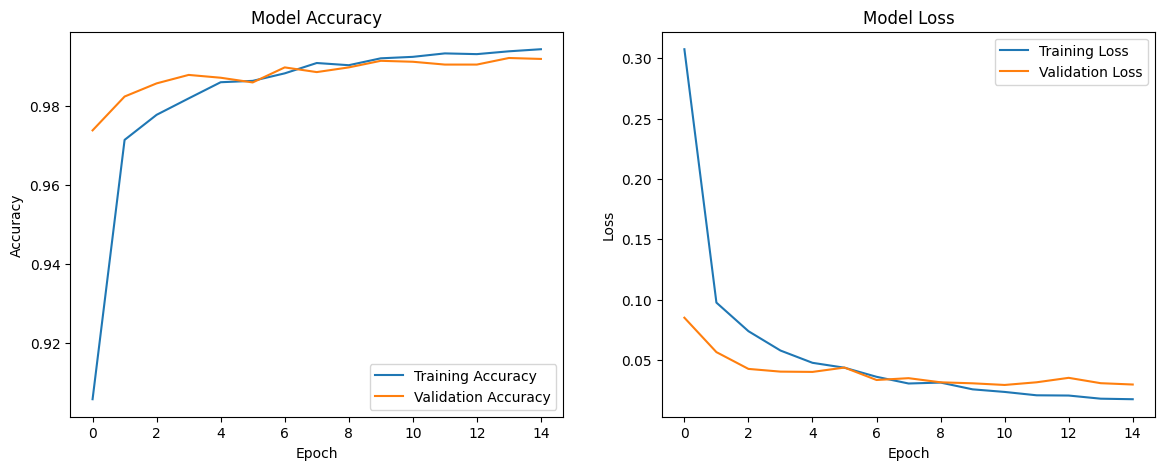

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [6]:
import matplotlib.pyplot as plt

# Visualize the training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plotting loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# Make predictions on the test data
predictions = model.predict(test_images)

# The model outputs probabilities for each class. We want the class with the highest probability.
predicted_classes = np.argmax(predictions, axis=1)

In [7]:
# Create the submission file
submission_df = pd.DataFrame({
    'ImageId': range(1, len(predicted_classes) + 1),
    'Label': predicted_classes
})

# Save the submission file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file created successfully!")
print(submission_df.head())

Submission file created successfully!
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
